# IMPORTATION OF NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [3]:
#LOAD THE DATASET INTO PANDAS DATAFRAME
Trip_advisorDF = pd.read_csv('tripadvisor_review.csv')

In [4]:
Trip_advisorDF.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [5]:
#WE RENAME COLUMNS
New_cols = ['user_id', 'art galleries', 'dance clubs', 'juice bars', 'restaurants',
            'museums', 'resorts', 'parks/picnic spots', 'beaches', 'theaters', 'religious institutions']
Trip_advisorDF.columns = New_cols

In [6]:
Trip_advisorDF.head()

,user_id,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


# EXPLORATORY DATA ANALYSIS

In [7]:
Trip_advisorDF.dtypes

user_id                    object
art galleries             float64
dance clubs               float64
juice bars                float64
restaurants               float64
museums                   float64
resorts                   float64
parks/picnic spots        float64
beaches                   float64
theaters                  float64
religious institutions    float64
dtype: object

In [8]:
Trip_advisorDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 980 non-null    object 
 1   art galleries           980 non-null    float64
 2   dance clubs             980 non-null    float64
 3   juice bars              980 non-null    float64
 4   restaurants             980 non-null    float64
 5   museums                 980 non-null    float64
 6   resorts                 980 non-null    float64
 7   parks/picnic spots      980 non-null    float64
 8   beaches                 980 non-null    float64
 9   theaters                980 non-null    float64
 10  religious institutions  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [9]:
#CHECK FOR MISSING VALUES
Trip_advisorDF.isnull().sum()

user_id                   0
art galleries             0
dance clubs               0
juice bars                0
restaurants               0
museums                   0
resorts                   0
parks/picnic spots        0
beaches                   0
theaters                  0
religious institutions    0
dtype: int64

In [10]:
Trip_advisorDF.shape

(980, 11)

In [11]:
Trip_advisorDF.describe()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


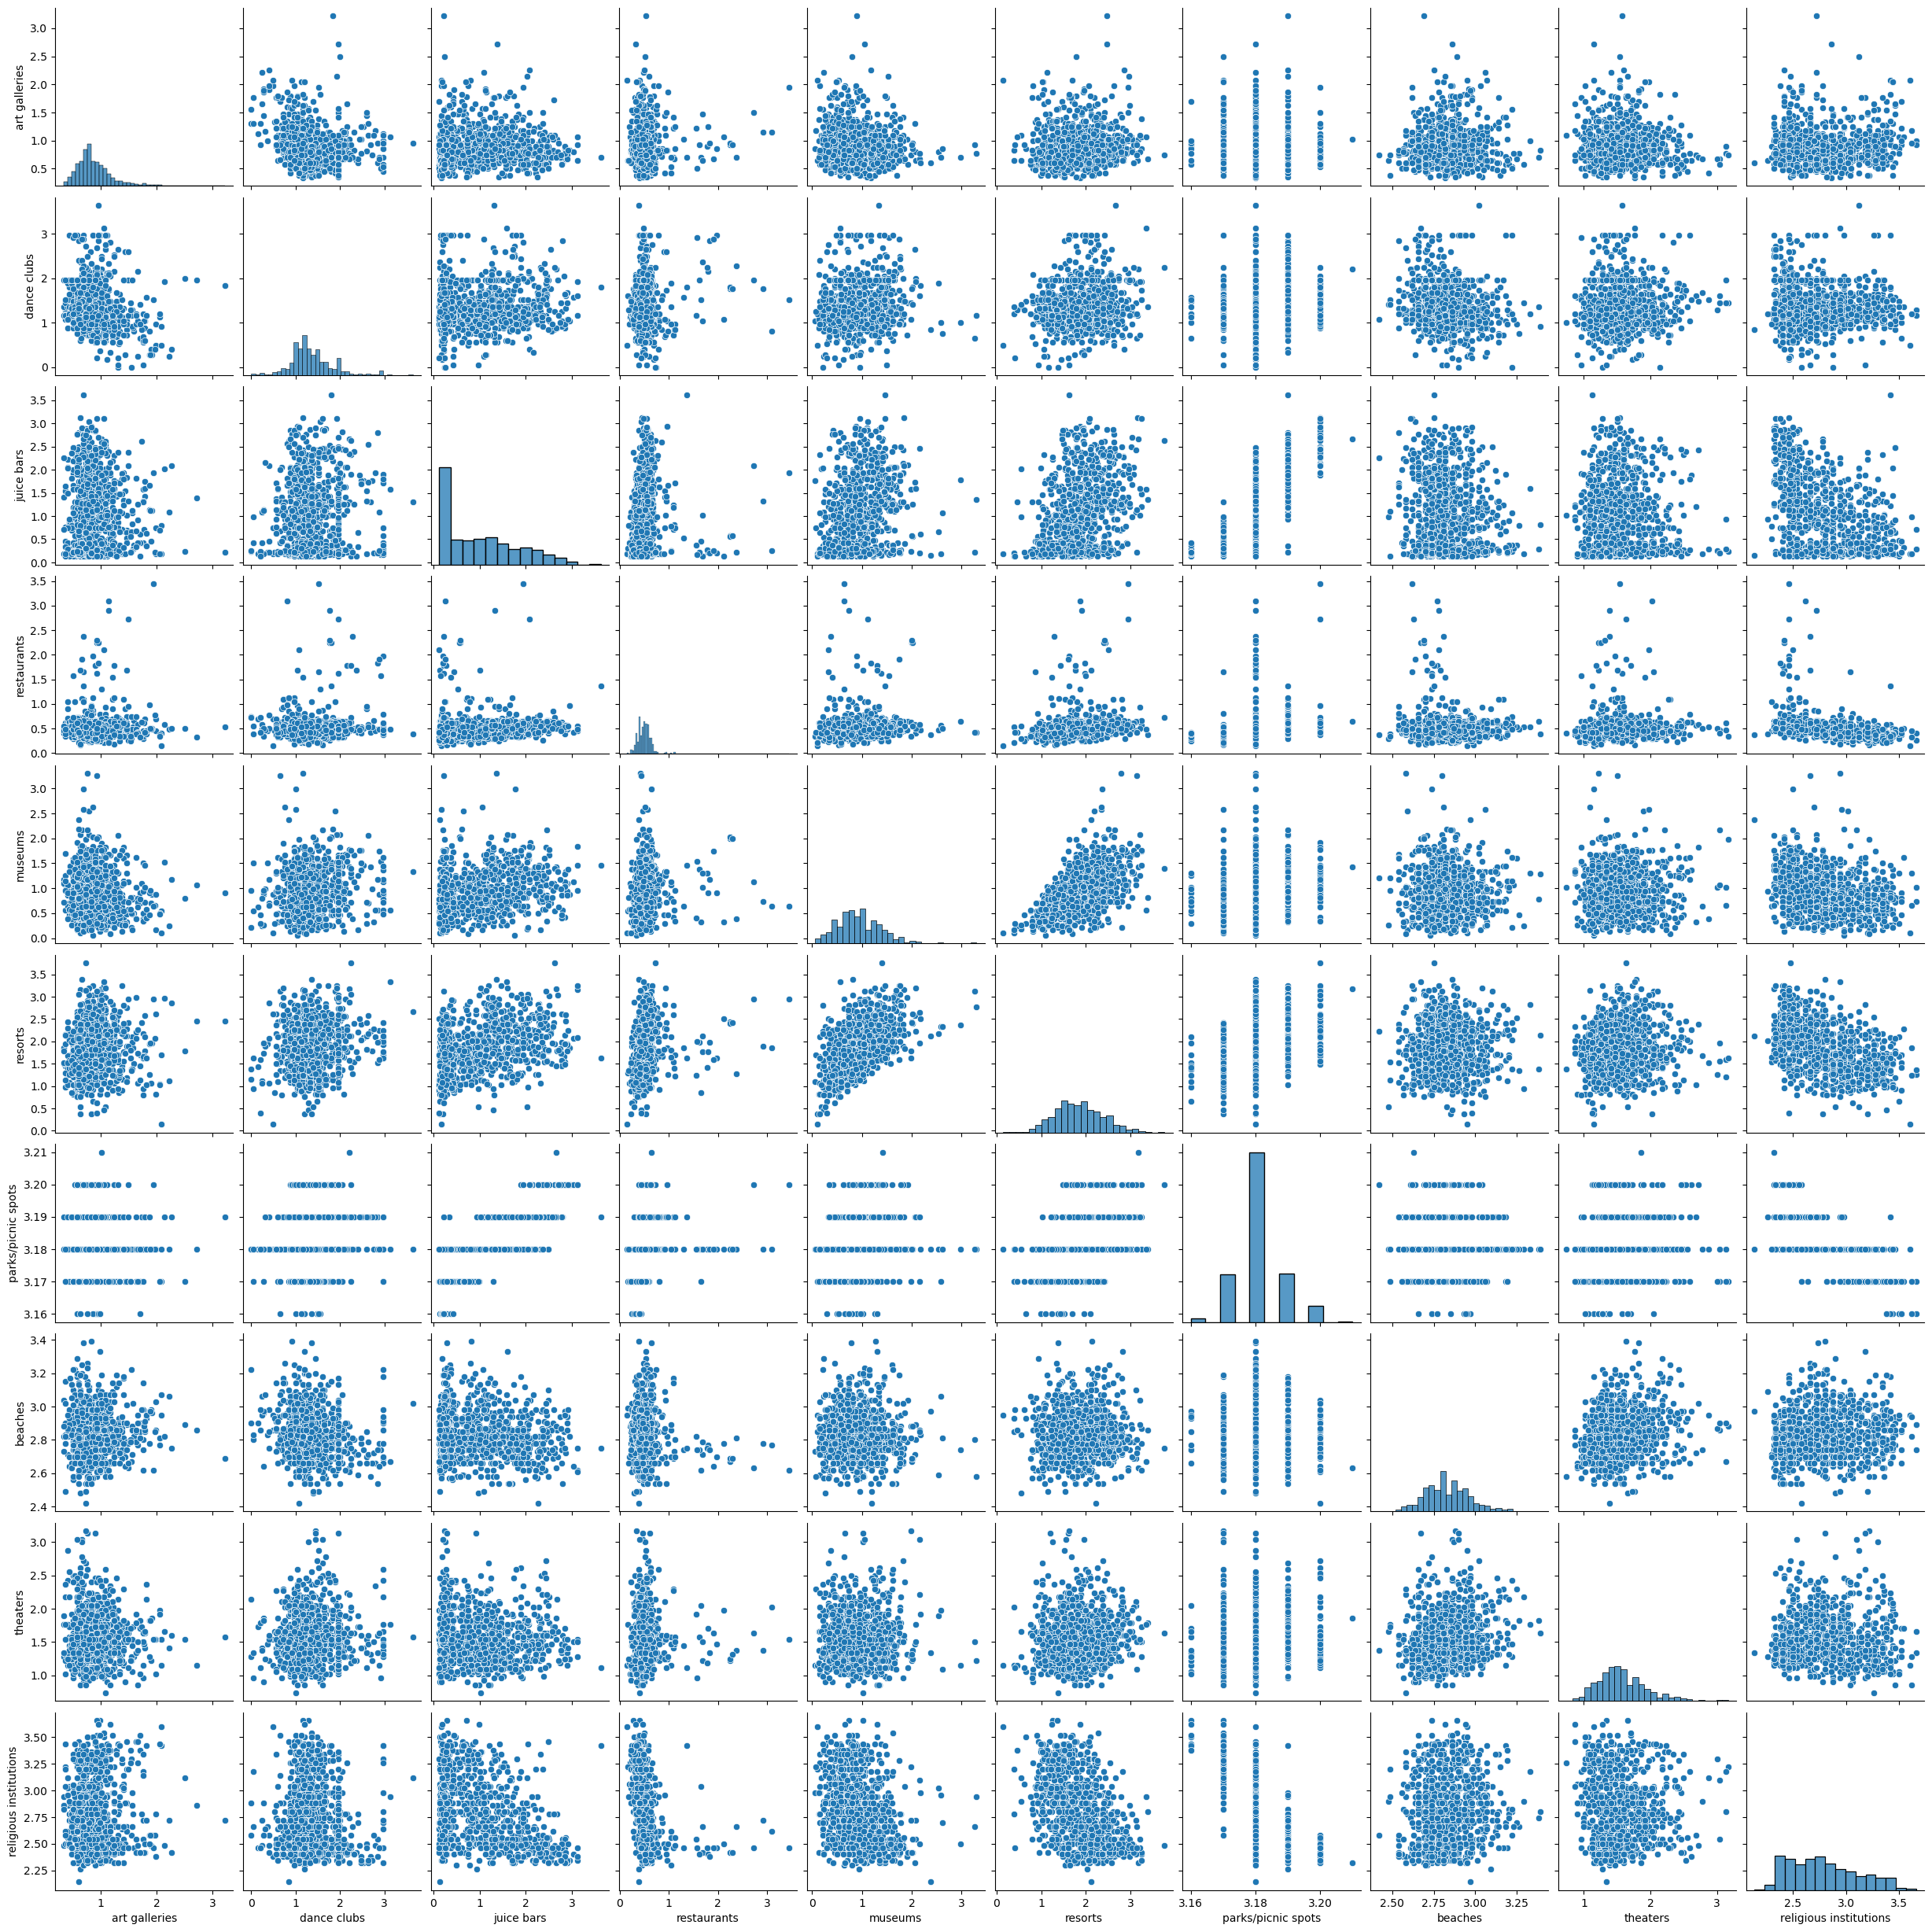

In [12]:
sns.pairplot(Trip_advisorDF, diag_kind='hist')

Text(0.5, 1.0, 'Average Rating for Categories')

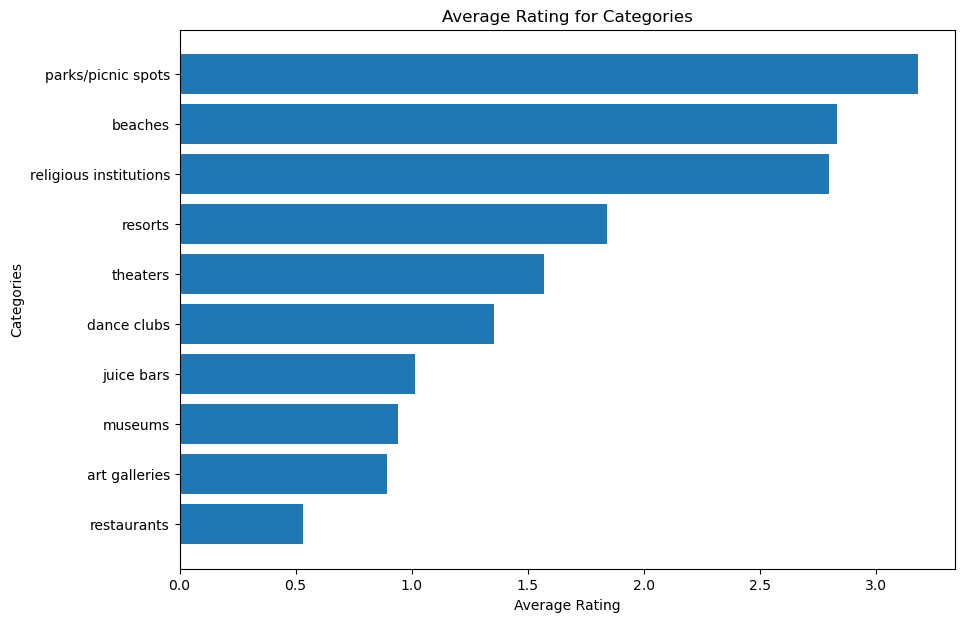

In [13]:
#Bullet bar plot for each distination ratings
AvgR = Trip_advisorDF[New_cols[1:]].mean()
AvgR = AvgR.sort_values()
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(New_cols[1:])), AvgR.values, align='center')
plt.yticks(np.arange(len(New_cols[1:])), AvgR.index)
plt.ylabel('Categories')
plt.xlabel('Average Rating')
plt.title('Average Rating for Categories')

# DATA PREPROCESSING

In [14]:
X = Trip_advisorDF.drop('user_id', axis = 1) 

In [15]:
X

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
#NORMALIZE THE DATASET
scaler = StandardScaler()
X = scaler.fit_transform(X)

# CENTROID BASED METHOD (KMEANS CLUSTERING)

In [18]:
from sklearn.cluster import KMeans

<function matplotlib.pyplot.show(close=None, block=None)>

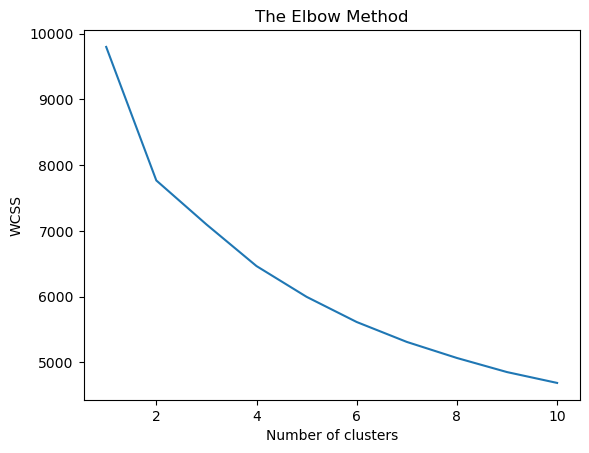

In [19]:
#WE USE KMEANS TO FIND THE OPTIMAL NUMBER OF CLUSTERS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [20]:
#WE FIT K-MEANS INTO THE DATASET
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [21]:
#WE GET THE CLUSTER LABELS
Kmeans_cluster = kmeans.labels_
Kmeans_cluster

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

# KMEAN CLUSTERING  EVALUATION 

In [22]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import pairwise_distances
from sklearn import metrics

In [23]:
#EVALUATION USING SILHOUETTE SCORE 
silh_score = silhouette_score(X, Kmeans_cluster)
silh_score

0.21315362778467906

# REDUCING THE DIMENTIONALITY FOR VISUALIZION

In [24]:
#WE USE PCA TO REDUCE DIMENTIONALITY BEFORE VISUALIZTION
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.29775044, 0.1262794 , 0.12330993])

In [25]:
Trip_advisorDF.shape

(980, 11)

In [26]:
x_reduced.shape

(980, 3)

In [27]:
#65% OF THE ORIGINAL VARIANCE IS EXPLAINED BY THE 4 DIMENSION
sum(pca.explained_variance_ratio_)

0.5473397667306865

Text(0.5, 0.5, 'Dimension 2')

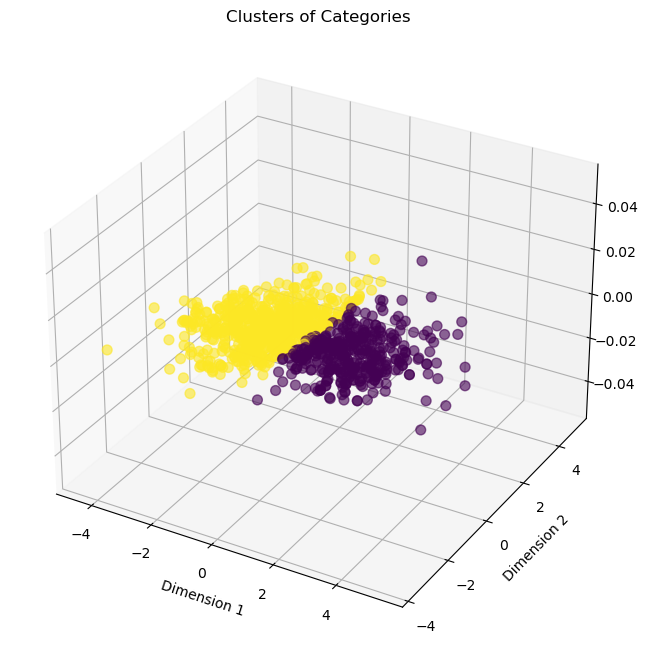

In [28]:
#3D VISUALIAZTION OF THE KMEAN CLUSTERS
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection= '3d')
scatplot = ax.scatter3D(x_reduced[:, 0], x_reduced[:, 1],c = Kmeans_cluster, s =50, alpha = 0.6)
plt.title('Clusters of Categories')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

In [29]:
clus_count = pd.DataFrame(Kmeans_cluster,columns=['Cluster'])
clus_count.value_counts()

Cluster
1          606
0          374
dtype: int64

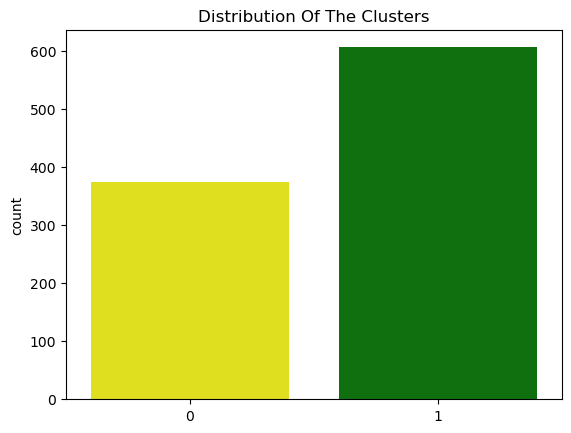

In [30]:
pal = ["yellow","green"]
pl = sns.countplot(x= Kmeans_cluster, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# HIERARCHICHAL CLUSTERING MODEL

In [31]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

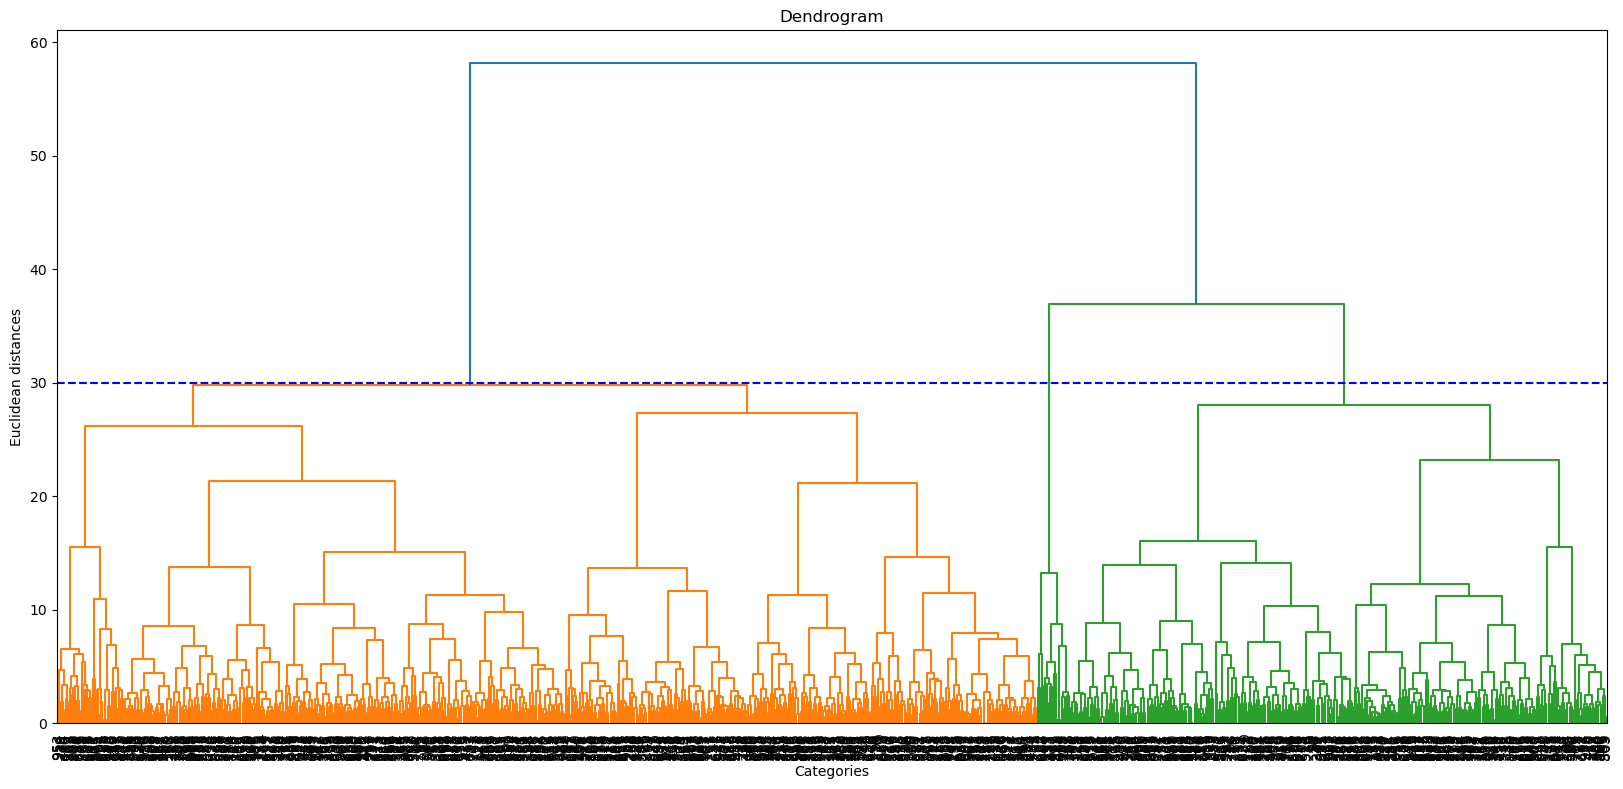

In [32]:
#DENDOGRAM PLOT
plt.figure(figsize=(20,9))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'),leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Categories')
plt.ylabel('Euclidean distances')
plt.grid(False)
plt.axhline(y=30, color='b', linestyle='--')
plt.show()

In [33]:
#fitting hierichical clustering to the dataset
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
#WE GET THE LABELS FOR HIERARCHICAL CLUSTER
hc_cluster = hc.labels_
hc_cluster

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

# HIERARCHICAL CLUSTERING EVALUATION

In [34]:
#EVALUATION USING SILHOUETTE SCORE 
silh_score = silhouette_score(X, hc_cluster)
silh_score

0.18468549414524332

# REDUCING THE DIMENTIONALITY FOR VISUALIZATION

Text(0.5, 0, 'Dimension 3')

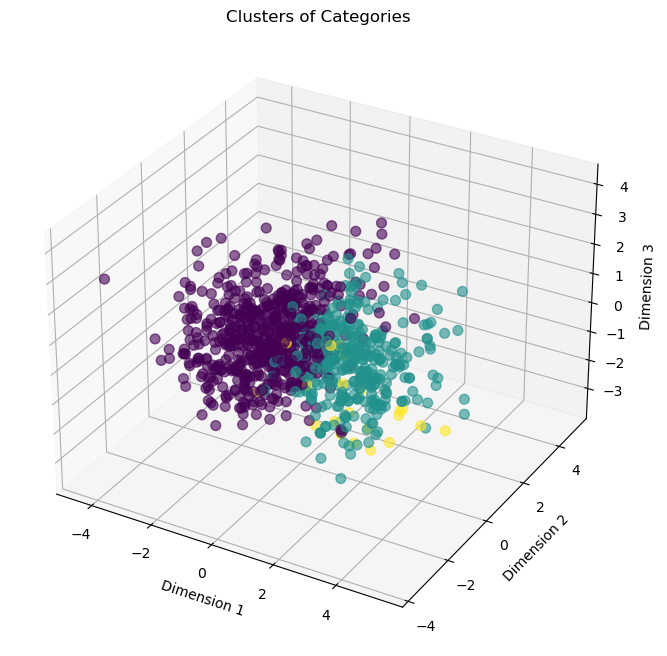

In [35]:
#3D VISUALIAZTION OF THE CLUSTERS
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection= '3d')
scatplot = ax.scatter3D(x_reduced[:, 0], x_reduced[:, 1], x_reduced[:, 2], c = hc_cluster, s =50, alpha = 0.6)
plt.title('Clusters of Categories')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

In [36]:
clus_count = pd.DataFrame(hc_cluster,columns=['Cluster'])
clus_count.value_counts()

Cluster
0          620
1          339
2           21
dtype: int64

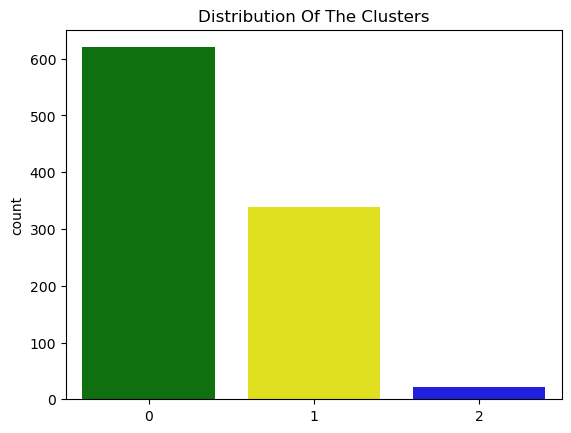

In [37]:
pal = ['green', 'yellow', 'blue']
pl = sns.countplot(x= hc_cluster, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# WE MERGE THE KMEANS CLUSTERS TO THE DATASET

In [38]:
Trip_advisorDF['cluster'] = Kmeans_cluster
df= Trip_advisorDF.drop('user_id', axis = 1)
df

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions,cluster
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,0
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,0
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,1
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,0
...,...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20,1
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80,1
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02,1
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46,1


In [39]:
df_melted = pd.melt(df, "cluster", var_name="categories")
df_melted

,cluster,categories,value
0,0,art galleries,0.93
1,0,art galleries,1.02
2,1,art galleries,1.22
3,1,art galleries,0.45
4,0,art galleries,0.51
...,...,...,...
9795,1,religious institutions,3.20
9796,1,religious institutions,2.80
9797,1,religious institutions,3.02
9798,1,religious institutions,2.46


Text(0.5, 1.01, 'Review rating of each cluster')

<Figure size 2000x1000 with 0 Axes>

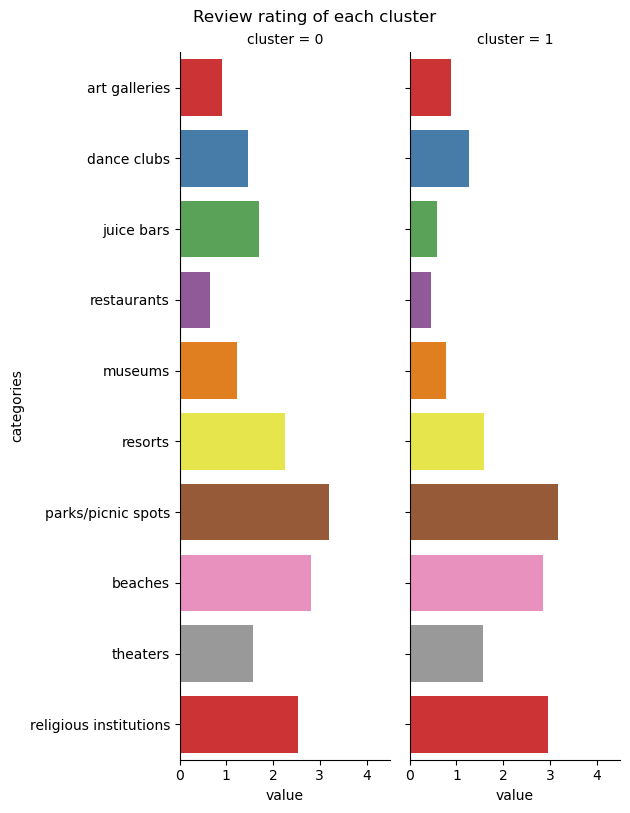

In [40]:
fig = plt.figure(figsize = (20,10))
g = sns.catplot(y='categories',x='value',data=df_melted,kind='bar',
                palette='Set1',ci=None,col = 'cluster',
               height = 8,aspect=0.4,
               facet_kws={'xlim':(0,4.5)})
fig.tight_layout(pad=0.5)
g.fig.suptitle('Review rating of each cluster',y=1.01,ha='center')